# *Chapter 9: Data analysis*

## Pandas Dataframes 

In [217]:
import pandas as pd

### Creating dataframes

In [218]:
# Creating a DataFrame from a dictionary of lists
data = {
    'Metal': ['Aluminum', 'Copper', 'Iron', 'Titanium', 'Nickel'],
    'Density': [2.70, 8.96, 7.87, 4.54, 8.90],
    'Young Modulus': [69, 110, 210, 116, 200]
}
df = pd.DataFrame(data)
print("------")
print(df)
print("------")
# Checking the size of the DataFrame
size = df.shape
print(f"The DataFrame has {size[0]} rows and {size[1]} columns.")


------
      Metal  Density  Young Modulus
0  Aluminum     2.70             69
1    Copper     8.96            110
2      Iron     7.87            210
3  Titanium     4.54            116
4    Nickel     8.90            200
------
The DataFrame has 5 rows and 3 columns.


In [219]:
print("------")
print(df.head(2))  # First 2 rows
print("------")
print(df.tail(3))  # Last 3 rows

------
      Metal  Density  Young Modulus
0  Aluminum     2.70             69
1    Copper     8.96            110
------
      Metal  Density  Young Modulus
2      Iron     7.87            210
3  Titanium     4.54            116
4    Nickel     8.90            200


#### Setting the index to a specific column

In [220]:
# Setting the 'Metal' column as the index
df.set_index('Metal', inplace=True)
print("New dataframe:")
print(df)

New dataframe:
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
Titanium     4.54            116
Nickel       8.90            200


### Accessing and editing content

#### Accessing columns

In [221]:
print("------")
print(df.head(2))  # First 2 rows
print("...")
print("------")

# Accessing a column by index
name_column = df['Density']
print(name_column)
print(type(name_column))
print("------")

# Accessing a column by index
young_column = df.iloc[:, 1]  # Access the second column
print(young_column)
print("-----")

------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
...
------
Metal
Aluminum    2.70
Copper      8.96
Iron        7.87
Titanium    4.54
Nickel      8.90
Name: Density, dtype: float64
<class 'pandas.core.series.Series'>
------
Metal
Aluminum     69
Copper      110
Iron        210
Titanium    116
Nickel      200
Name: Young Modulus, dtype: int64
-----


#### Accessing rows and extracting Series

In [222]:
print("------")
print(df.head(3))  # First 3 rows for reference
print("...")
print("------")

iron_row = df.loc["Iron"] # Extract iron row by index label
print(iron_row)
print(type(iron_row))
print("------")

fourth_row = df.iloc[3] # Fourth row by index
print(fourth_row)
print(type(fourth_row))
print("------")

# Extract series keys and values as lists
categories = list(fourth_row.keys())
values = list(fourth_row.values)
print(categories, values)

------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
...
------
Density            7.87
Young Modulus    210.00
Name: Iron, dtype: float64
<class 'pandas.core.series.Series'>
------
Density            4.54
Young Modulus    116.00
Name: Titanium, dtype: float64
<class 'pandas.core.series.Series'>
------
['Density', 'Young Modulus'] [4.54, 116.0]


#### Adding and removing columns

In [223]:
# Make a copy of original df
df2 = df.copy()

# Adding a new column at index=1
df2.insert(1, 'Melting Point', [660, 1085, 1538, 1668, 1455])
print('------')
print(df2)

# Removing a column by name
df3 = df2.copy()
df3 = df3.drop(columns=['Melting Point'])
print("------")
print(df3)

# Removing a column by index
df3 = df2.copy()
# Remove the  
df3 = df3.drop(df3.columns[0:2], axis=1)  # Remove 1st and 2nd cols
print("------")
print(df3)

------
          Density  Melting Point  Young Modulus
Metal                                          
Aluminum     2.70            660             69
Copper       8.96           1085            110
Iron         7.87           1538            210
Titanium     4.54           1668            116
Nickel       8.90           1455            200
------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
Titanium     4.54            116
Nickel       8.90            200
------
          Young Modulus
Metal                  
Aluminum             69
Copper              110
Iron                210
Titanium            116
Nickel              200


#### Removing rows

In [224]:
# Make a copy of original df
df2 = df.copy()

# Remove rows by their index (for example, rows with index 1 and 3)
df2 = df2.drop(index=["Iron", "Aluminum"])
print("------")
print(df2)

# Remove rows by their integer location (for example, rows at index 1 and 3)
df2 = df.copy()
indices_to_keep = [i for i in range(len(df)) if i not in [1, 3]]
df2 = df.iloc[indices_to_keep]
print("------")
print(df2)

------
          Density  Young Modulus
Metal                           
Copper       8.96            110
Titanium     4.54            116
Nickel       8.90            200
------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Iron         7.87            210
Nickel       8.90            200


#### Accessing cells and labels

In [225]:
print("------")
print(df.head(3))  # First 3 rows for reference
print("...")

# Accessing a specific cell using loc (row label and column label)
copper_density = df.loc['Copper', 'Density']
print(f"Density of copper: {copper_density}")

# Accessing a specific cell using iloc (row index and column index)
value = df.iloc[0, 1]      # access cell in first row, second column
row_label = df.index[0]    # label of first row
col_label = df.columns[1]  # label of second column
print(f"{col_label} of {row_label}: {value}")

------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
...
Density of copper: 8.96
Young Modulus of Aluminum: 69


In [226]:
print("------")
print(df.head(3))  # Print first 3 rows for reference
print("...")

# Make a copy of original df
df2 = df.copy()

# Change cells
df2.loc['Copper', 'Density'] = 8.94
df2.iloc[2, 1] = 209

print("------")
print(df2.head(3))  # Print new dataframe
print("...")


------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
...
------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.94            110
Iron         7.87            209
...


#### Merging two dataframes (or adding rows)

In [227]:
# Create a second DataFrame
new_data = {
    'Metal': ['Lead', 'Platinum'],
    'Density': [11.34, 21.45],
    'Young Modulus': [16, 168]
}
second_df = pd.DataFrame(new_data)
print("------")
print(second_df)

second_df.set_index('Metal', inplace=True)
print("------")
print(second_df)

# Merging the two DataFrames
merged_df = pd.concat([df, second_df], ignore_index=False)
print("------")
print(merged_df)

# Merging the two DataFrames overriding the index label
merged_df2 = pd.concat([df, second_df], ignore_index=True)
print("------")
print(merged_df2)

------
      Metal  Density  Young Modulus
0      Lead    11.34             16
1  Platinum    21.45            168
------
          Density  Young Modulus
Metal                           
Lead        11.34             16
Platinum    21.45            168
------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
Titanium     4.54            116
Nickel       8.90            200
Lead        11.34             16
Platinum    21.45            168
------
   Density  Young Modulus
0     2.70             69
1     8.96            110
2     7.87            210
3     4.54            116
4     8.90            200
5    11.34             16
6    21.45            168


## Dataframe Methods

In [228]:
import pandas as pd

# Create DataFrame
data = {
    'Metal': [ 'Copper', 'Iron', 'Titanium', 'Nickel', 'Aluminum'],
    'Density': [8.96, 7.87, 4.54, 8.90, 2.70],
    'Young Modulus': [110, 210, 116, 200, 69]
}
df = pd.DataFrame(data)
df.set_index('Metal', inplace=True)
print("------")
print(df)

------
          Density  Young Modulus
Metal                           
Copper       8.96            110
Iron         7.87            210
Titanium     4.54            116
Nickel       8.90            200
Aluminum     2.70             69


#### Filtering

In [229]:
# Filtering metals with density greater than 5 g/cm³
filtered_df = df[df['Density'] > 5]
print("------")
print(filtered_df)


------
        Density  Young Modulus
Metal                         
Copper     8.96            110
Iron       7.87            210
Nickel     8.90            200


#### Sorting

In [230]:
# Sorting table by ascending (alphabetical) order of metals
sorted_df = df.sort_values(by='Metal')
print("------")
print(sorted_df)

# Sorting by Young's Modulus in descending order
sorted_df_desc = df.sort_values(by='Young Modulus', ascending=False)
print("------")
print(sorted_df_desc)


------
          Density  Young Modulus
Metal                           
Aluminum     2.70             69
Copper       8.96            110
Iron         7.87            210
Nickel       8.90            200
Titanium     4.54            116
------
          Density  Young Modulus
Metal                           
Iron         7.87            210
Nickel       8.90            200
Titanium     4.54            116
Copper       8.96            110
Aluminum     2.70             69


#### Basic statistics

In [231]:
# Calculating summary statistics
summary_statistics = df.describe()
print("------")
print(summary_statistics)

------
        Density  Young Modulus
count  5.000000       5.000000
mean   6.594000     141.000000
std    2.825151      61.261734
min    2.700000      69.000000
25%    4.540000     110.000000
50%    7.870000     116.000000
75%    8.900000     200.000000
max    8.960000     210.000000


#### Max, min, mean, std

In [232]:
# Finding the maximum Young's Modulus
max_modulus = df['Young Modulus'].max()
print(f"Maximum Young's Modulus: {max_modulus}")

# Finding the minimum Young's Modulus
min_modulus = df['Young Modulus'].min()
print(f"Minimum Young's Modulus: {min_modulus}")

# Calculating the mean density
mean_density = df['Density'].mean()
print(f"Mean Density: {mean_density}")
# Calculating the mean density
std_density = df['Density'].std()
print(f"STD of Density: {std_density}")


Maximum Young's Modulus: 210
Minimum Young's Modulus: 69
Mean Density: 6.594000000000001
STD of Density: 2.8251513233807497


#### Groupby (advanced)

The groupby() method in pandas is a powerful tool for grouping data and performing aggregate operations on those groups.

In [233]:
df2 = df.copy()
# Assuming we have another column 'Category'
df2['Category'] = ['Light', 'Heavy', 'Heavy', 'Light', 'Heavy']
print("------")
print(df2)

# Grouping by 'Category' and calculating the mean of each numeric column
grouped_df = df2.groupby('Category')[['Density', 'Young Modulus']].mean()
print('------')
print(grouped_df)


------
          Density  Young Modulus Category
Metal                                    
Copper       8.96            110    Light
Iron         7.87            210    Heavy
Titanium     4.54            116    Heavy
Nickel       8.90            200    Light
Aluminum     2.70             69    Heavy
------
           Density  Young Modulus
Category                         
Heavy     5.036667     131.666667
Light     8.930000     155.000000


## Dataframes and NaN values

In [234]:
import pandas as pd
import numpy as np

# Creating a DataFrame with NaN values
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Maths': [85, 78, np.nan, 92, 88, np.nan],
    'Physics': [np.nan, 80, 75, np.nan, 90, 85]
}
df = pd.DataFrame(data)
print("------")
print(df)


------
   Student  Maths  Physics
0    Alice   85.0      NaN
1      Bob   78.0     80.0
2  Charlie    NaN     75.0
3    David   92.0      NaN
4      Eve   88.0     90.0
5    Frank    NaN     85.0


### Removing NaN values

In [235]:
# Removing rows with any NaN values
df_clean = df.dropna()
print('------')
print(df_clean)

# Reset index
df_clean = df_clean.reset_index(drop=True)
print('------')
print(df_clean)


------
  Student  Maths  Physics
1     Bob   78.0     80.0
4     Eve   88.0     90.0
------
  Student  Maths  Physics
0     Bob   78.0     80.0
1     Eve   88.0     90.0


In [236]:
# Filling NaN Maths values with 0 and Physics values with 50.0
df_filled = df.copy()
df_filled['Maths'] = df['Maths'].fillna(0)
df_filled['Physics'] = df['Physics'].fillna(50.0)
print("------")
print(df_filled)

------
   Student  Maths  Physics
0    Alice   85.0     50.0
1      Bob   78.0     80.0
2  Charlie    0.0     75.0
3    David   92.0     50.0
4      Eve   88.0     90.0
5    Frank    0.0     85.0


## Data analysis

In [237]:
# Metals dataframe with Melting Point added
data = {
    'Metal': ['Copper', 'Iron', 'Titanium', 'Nickel', 'Aluminum', 'Gold', 'Silver', 
              'Platinum', 'Lead', 'Zinc', 'Tin'],
    'Density': [8.96, 7.87, 4.54, 8.90, 2.70, 19.32, 10.49, 21.45, 11.34, 7.14, 7.31],
    'Young Modulus': [110, 210, 116, 200, 69, 79, 83, 168, 16, 108, 50],
    'Melting Point': [1085, 1538, 1668, 1455, 660, 1064, 961, 1768, 327, 419, 232]
}

df = pd.DataFrame(data)
df.set_index('Metal', inplace=True)
print('------')
print(df)


------
          Density  Young Modulus  Melting Point
Metal                                          
Copper       8.96            110           1085
Iron         7.87            210           1538
Titanium     4.54            116           1668
Nickel       8.90            200           1455
Aluminum     2.70             69            660
Gold        19.32             79           1064
Silver      10.49             83            961
Platinum    21.45            168           1768
Lead        11.34             16            327
Zinc         7.14            108            419
Tin          7.31             50            232


### Scatter plots

#### Scatter plot of Melting Point vs Density

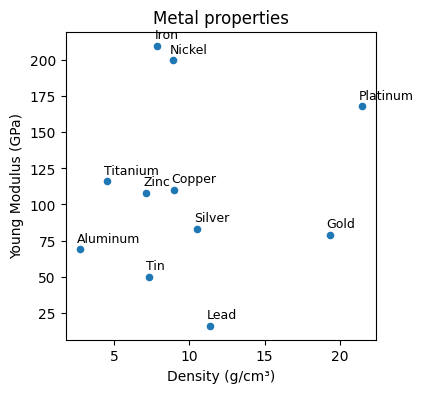

In [238]:
# Plotting Melting Point vs Density
ax = df.plot(kind='scatter', x='Density', y='Young Modulus', 
             title='Metal properties', figsize=(4, 4))
ax.set_xlabel('Density (g/cm³)')
ax.set_ylabel('Young Modulus (GPa)')

# Adding labels to the points with an offset
for row_index, row in df.iterrows():
    ax.text(row['Density'] - 0.2, row['Young Modulus'] + 5, 
            row_index, fontsize=9)

#### Task 1: Scatter plot of Young Modulus vs Melting point

Produce a scatter plot of Young Modulus vs Melting Point for the metals in the dataframe. Label each point with the corresponding metal.

##### Answer

##### Solution

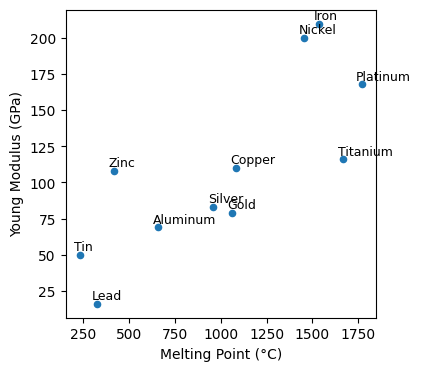

In [239]:
# Plotting Young Modulus vs Melting Point
ax = df.plot(kind='scatter', x='Melting Point', y='Young Modulus',
             figsize=(4, 4))
ax.set_ylabel('Young Modulus (GPa)')
ax.set_xlabel('Melting Point (°C)')

# Adding labels to the points with an offset
for row_index, row in df.iterrows():
    ax.text(row['Melting Point'] - 30, row['Young Modulus'] + 3, 
            row_index, fontsize=9)

### Linear regression

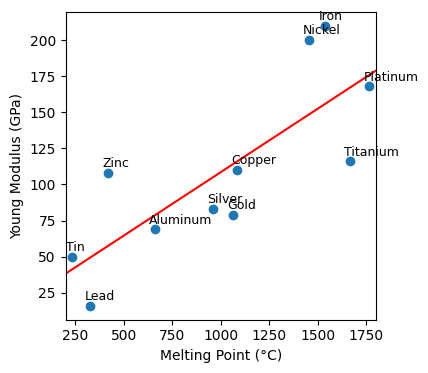

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Get x and y data
x = df['Melting Point']
y = df['Young Modulus']

# Perform linear regression (polynomial fit of order 1)
m, b = np.polyfit(x, y, 1)  # m is slope, b is intercept
x_fit = np.linspace(100, 2000, 10)
y_fit = m*x_fit + b

# Plotting Melting Point vs Young Modulus using plt.scatter
plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.xlabel('Melting Point (°C)')
plt.ylabel('Young Modulus (GPa)')
# Add line of best fit
plt.plot(x_fit, y_fit, color='red')

# Adjust limits for clarity
plt.xlim([200, 1800])

# Adding labels to the points with an offset
for row_index, row in df.iterrows():
    plt.text(row['Melting Point'] - 30, row['Young Modulus'] + 4, row_index, fontsize=9)

plt.show()


### Bar charts

The code below produces a bar chart for Young's Modulus of various metals using the `df.plot` method

Text(0, 0.5, 'Young Modulus (GPa)')

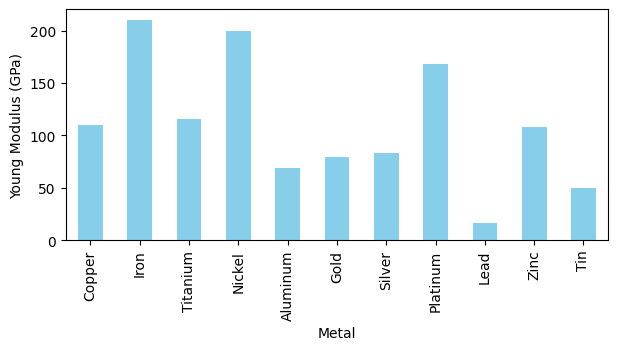

In [241]:
# Plotting the bar chart for Young's Modulus
ax1 = df['Young Modulus'].plot(kind='bar', 
        figsize=(7, 3), color='skyblue')

# Setting labels and title
ax1.set_xlabel('Metal')
ax1.set_ylabel('Young Modulus (GPa)')

Now, using `matplotlib` and `plt.bar`:

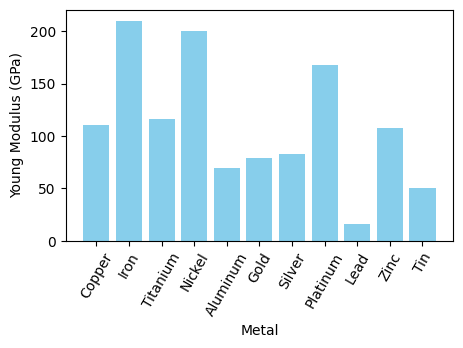

In [242]:
# Plotting the bar chart for Young's Modulus using plt.bar
plt.figure(figsize=(5,3))
plt.bar(df.index, df['Young Modulus'], color='skyblue')

# Setting labels and title
plt.xlabel('Metal')
plt.ylabel('Young Modulus (GPa)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

## Exercise 9.1 Cumulative grade distributions.

Upload the file 'IAL_June_2022.csv' into the working directory. The CSV file  can be easily imported as a dataframe as follows:

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading a CSV file into a DataFrame
df = pd.read_csv('IAL_June_2022.csv')
print("IAL_June_2022.csv:")
print(df)

IAL_June_2022.csv:
                   Subject    Sat    A*     A     B      C      D      E  \
0                   ARABIC   1597   657  1237  1491   1557   1576   1586   
1               ACCOUNTING   1489   244   678   969   1181   1316   1406   
2                  BIOLOGY   3758  1013  1960  2607   3091   3432   3624   
3                 BUSINESS   2238   209   761  1327   1761   2039   2164   
4                CHEMISTRY   4905   982  2422  3322   3965   4438   4733   
5                ECONOMICS   2674   424  1396  2042   2354   2537   2615   
6         ENGLISH LANGUAGE    269    22    71   133    193    233    253   
7       ENGLISH LITERATURE    417    59   153   283    356    391    414   
8      FURTHER MATHEMATICS   2705  1274  1971  2321   2506   2604   2664   
9                   FRENCH    423    36   209   299    374    404    418   
10               GEOGRAPHY    325    29   139   217    278    301    316   
11                   GREEK    487   106   331   436    470    474    

### Task 1

Create a new dataframe, `df22`, that only has columns:

A*% &nbsp; A% &nbsp;   B% &nbsp;   C% &nbsp;   D%  &nbsp;  E% &nbsp;    U%

and where the column "Subject" is set as the (row) index.
Lastly, rename the columns of `df22` (remove the %) as

A* &nbsp; A &nbsp; B &nbsp; C &nbsp; D &nbsp; E &nbsp; U

The latter can be done through the command:
```
df22.columns = [col.replace("%", "") for col in df22.columns]
```

#### Answer

#### Solution

In [244]:
df22 = df.copy()
df22.set_index("Subject", inplace=True)
df22 = df22.drop(df22.columns[0:8], axis=1)
df22.columns = [col.replace("%", "") for col in df22.columns]
print("df22:")
print(df22)

df22:
                          A*     A     B     C     D     E      U
Subject                                                          
ARABIC                  41.1  77.5  93.4  97.5  98.7  99.3  100.0
ACCOUNTING              16.4  45.5  65.1  79.3  88.4  94.4  100.0
BIOLOGY                 27.0  52.2  69.4  82.3  91.3  96.4  100.0
BUSINESS                 9.3  34.0  59.3  78.7  91.1  96.7  100.0
CHEMISTRY               20.0  49.4  67.7  80.8  90.5  96.5  100.0
ECONOMICS               15.9  52.2  76.4  88.0  94.9  97.8  100.0
ENGLISH LANGUAGE         8.2  26.4  49.4  71.7  86.6  94.1  100.0
ENGLISH LITERATURE      14.1  36.7  67.9  85.4  93.8  99.3  100.0
FURTHER MATHEMATICS     47.1  72.9  85.8  92.6  96.3  98.5  100.0
FRENCH                   8.5  49.4  70.7  88.4  95.5  98.8  100.0
GEOGRAPHY                8.9  42.8  66.8  85.5  92.6  97.2  100.0
GREEK                   21.8  68.0  89.5  96.5  97.3  99.4  100.0
GERMAN                  17.6  69.8  84.9  91.0  94.3  99.2  100.0
HIST

### Task 2

Using the dataframe `df22` from Exercise 1, plot a bar chart showing showing the cumulative % of learners (bar height)  achieving the A* A, B, C, D, E and U for the subject of MATHEMATICS. You may want to extract the relevant row as a Series.

#### Answer

#### Solution

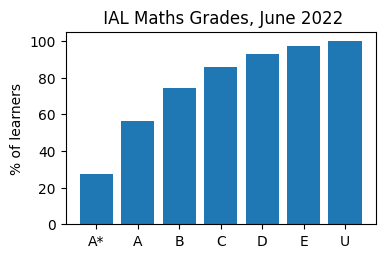

In [245]:
df22 = df.copy()
df22.set_index("Subject", inplace=True)
df22 = df22.drop(df22.columns[0:8], axis=1)
df22.columns = [col.replace("%", "") for col in df22.columns]

maths = df22.loc["MATHEMATICS"]
grades = df22.columns

# Plot bar chart
plt.figure(figsize=(4,2.5))
plt.bar(grades, maths.values, align='center')
plt.ylabel('% of learners')
plt.title(' IAL Maths Grades, June 2022')
plt.show()

### Task 3

Using the dataframe `df22` from Exercise 1, generate a stacked barchart that plots the cumulative frequency distribution of grades (A* to U) for four subjects of your choosing. Note that each bar should represent a specific subject.  The frequencies should be read from the dataframe; do not type them in manually.

**Challenge**: include all subjects.

It may be usfeul to percentage of learners that got surpassed given grade as a numpy array. Eg,
```python
percentages = np.array(df22["B%"])
```
Each element in the array```percentages``` corresponds to a particular subject.


The code below shows how to produce a stacked bar chart. Use it as reference.

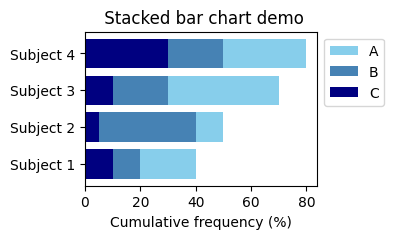

In [246]:
import matplotlib.pyplot as plt

# Dummy data
subjects = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
grades = ["A", "B", "C"]
a_grade = np.array([10, 5, 10, 30])
b_grade = np.array([20, 40, 30, 50])
c_grade = np.array([40, 50, 70, 80])

# plot bars in stack manner
plt.figure(figsize=(3,2))
plt.barh(subjects, c_grade, color="skyblue")
plt.barh(subjects, b_grade, color = "steelblue")
plt.barh(subjects, a_grade, color="navy")

plt.xlabel('Cumulative frequency (%)')
plt.title(" Stacked bar chart demo")
plt.legend(grades, bbox_to_anchor=(1, 1))
plt.show()

#### Answer

#### Solution

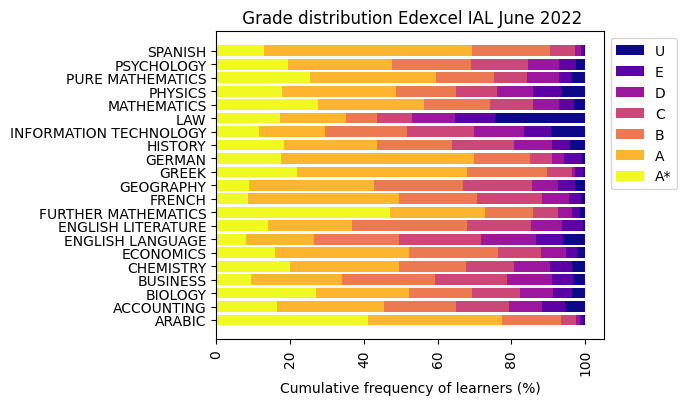

In [247]:
import matplotlib.pyplot as plt
import numpy as np

df22 = df.copy()
df22.set_index("Subject", inplace=True)
df22 = df22.drop(df22.columns[0:8], axis=1)
df22.columns = [col.replace("%", "") for col in df22.columns]

# List of numpy arrays
percentages_by_grade = []
for column in df22.columns:
  percentages = np.array(df22[column])
  percentages_by_grade.append(percentages)
percentages_by_grade.reverse()

# List of grade labels
grades = list(df22.columns)
grades.reverse()

# List of subjects
subjects = list(df22.index)

# Using 'plasma' colormap to generate a list of colors
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, 7))
# Plotting bars in stack manner
plt.figure(figsize=(5,4))
for i, percentages in enumerate(percentages_by_grade):
  if i==0:
    bottom = 0
  else:
    bottom = sum(percentages_by_grade[0:i])
  plt.barh(subjects, percentages, color=colors[i])
plt.xlabel('Cumulative frequency of learners (%)')
plt.title(" Grade distribution Edexcel IAL June 2022")
plt.legend(grades, bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

Below is the full analysis for the 2023 statistics in 'IAL_June_2023.csv'

------
              A*     A     B     C     D     E      U
Subject                                              
ARABIC      22.4  62.5  84.6  95.0  98.2  99.7  100.0
ACCOUNTING   6.0  31.5  50.4  66.6  79.9  89.8  100.0
BIOLOGY     22.6  43.6  58.5  71.2  82.0  90.9  100.0
BUSINESS     9.6  28.6  51.6  69.7  83.8  91.9  100.0
CHEMISTRY   14.1  40.6  57.9  72.2  83.4  91.7  100.0


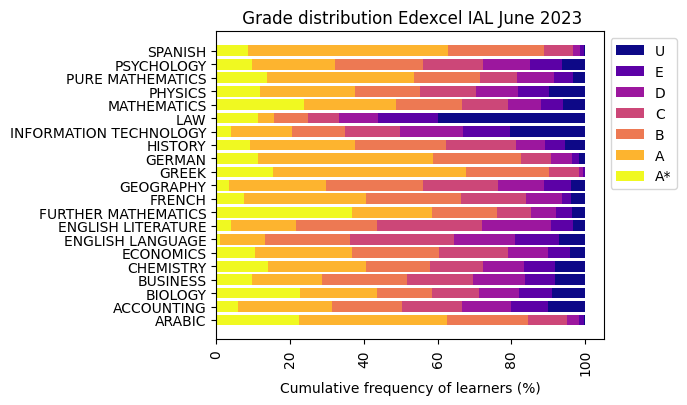

In [248]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reading the 2023 CSV file into a DataFrame
df23 = pd.read_csv('IAL_June_2023.csv')
df23.set_index("Subject", inplace=True)
df23 = df23.drop(df23.columns[0:8], axis=1)
df23.columns = [col.replace("%", "") for col in df23.columns]
print('------')
print(df23.head())

# List of numpy arrays
percentages_by_grade = []
for column in df23.columns:
  percentages = np.array(df23[column])
  percentages_by_grade.append(percentages)
percentages_by_grade.reverse()

# List of grade labels
grades = list(df23.columns)
grades.reverse()

# List of subjects
subjects = list(df23.index)

# List of colors (colormap)
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, 7))

# Plotting bars in stack manner
plt.figure(figsize=(5,4))
for i, percentages in enumerate(percentages_by_grade):
  if i==0:
    bottom = 0
  else:
    bottom = sum(percentages_by_grade[0:i])
  plt.barh(subjects, percentages, color=colors[i])
plt.xlabel('Cumulative frequency of learners (%)')
plt.title(" Grade distribution Edexcel IAL June 2023")
plt.legend(grades, bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

##  Exercise 9.2 Evolution of the grade distributions

You have two datasets, 'IAL_June_2022.csv' and 'IAL_June_2023.csv', containing the grade distribution of learners in years 2022 and 2023, respectively, for the same set of subjects. Your task is to create a scatter plot to visualize the relationship between the percentages of learners achieving grade 'A' or higher in 2022 versus 2023.

**Scatter Plot**: Plot the percentage of learners achieving at least a grade 'A' in 2022 (x-axis) against the percentage of learners achieving at least a grade 'A' in 2023 (y-axis). Each data point in the scatter plot represents a specific subject.
Make sure to include:

1. **Line of Best Fit**: Add a line of best fit to the scatter plot to show the trend.
2. **Center of Mass**: Highlight the center of mass (mean x, mean y) with a prominent marker.
3. **No-change Reference Line**: Include a dashed diagonal line y = x as reference.
5. **Labels**: Add labels for each point, displaying the first two characters of the subject name.
6. **Plot Adjustments**: Ensure that equal plot limits are set for both axes (e.g. 10 to 80) and enable grid lines for better readability.

**Extra**: Reuse your code to produce a second scatter plot that shows the relationship between the percentages of learners achieving grade 'B' or higher in 2022 versus 2023.


#### Answer

#### Solution

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the 2022 CSV file into a DataFrame
df22 = pd.read_csv('IAL_June_2022.csv')
df22.set_index("Subject", inplace=True)
df22 = df22.drop(df22.columns[0:8], axis=1)
df22.columns = [col.replace("%", "") for col in df22.columns]
print('------')
print(df22.head())

# Reading the 2023 CSV file into a DataFrame
df23 = pd.read_csv('IAL_June_2023.csv')
df23.set_index("Subject", inplace=True)
df23 = df23.drop(df23.columns[0:8], axis=1)
df23.columns = [col.replace("%", "") for col in df23.columns]
print('------')
print(df23.head())

------
              A*     A     B     C     D     E      U
Subject                                              
ARABIC      41.1  77.5  93.4  97.5  98.7  99.3  100.0
ACCOUNTING  16.4  45.5  65.1  79.3  88.4  94.4  100.0
BIOLOGY     27.0  52.2  69.4  82.3  91.3  96.4  100.0
BUSINESS     9.3  34.0  59.3  78.7  91.1  96.7  100.0
CHEMISTRY   20.0  49.4  67.7  80.8  90.5  96.5  100.0
------
              A*     A     B     C     D     E      U
Subject                                              
ARABIC      22.4  62.5  84.6  95.0  98.2  99.7  100.0
ACCOUNTING   6.0  31.5  50.4  66.6  79.9  89.8  100.0
BIOLOGY     22.6  43.6  58.5  71.2  82.0  90.9  100.0
BUSINESS     9.6  28.6  51.6  69.7  83.8  91.9  100.0
CHEMISTRY   14.1  40.6  57.9  72.2  83.4  91.7  100.0


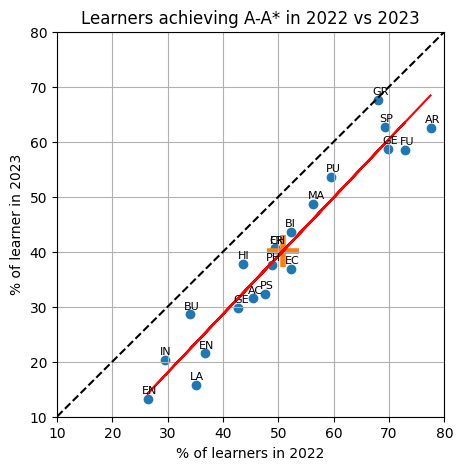

In [250]:
import numpy as np
# Define x and y data
grade = "A"
x = df22[grade]
y = df23[grade]

# Plotting using plt.scatter
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel('% of learners in 2022')
plt.ylabel('% of learner in 2023')
plt.title('Learners achieving A-A* in 2022 vs 2023')

# Add line of best fit
m, c = np.polyfit(x, y, 1)
y_fit = m*x+c
plt.plot(x, y_fit, color='red')

# Add center of mass (mean x, mean y)
plt.scatter(np.mean(x), np.mean(y), marker='+', s=500,linewidths=4)

# Adjust limits for clarity
plt.xlim([10, 80])
plt.ylim([10, 80])
plt.grid("on")
plt.plot([0, 100], [0, 100], '--', color="k")
# Adding labels to the points with an offset
for subject in df22.index:
  plt.text(df22.loc[subject,grade]-1, df23.loc[subject,grade]+1, 
           subject[:2], fontsize=8)

plt.show()


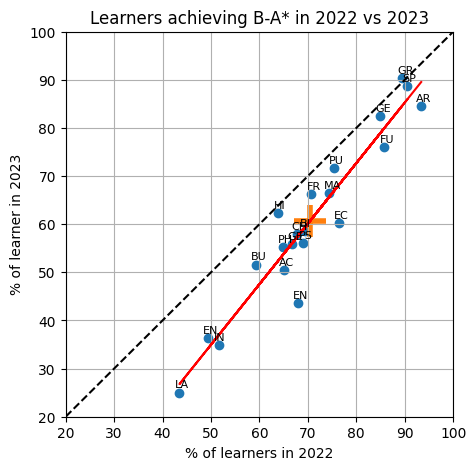

In [251]:
import numpy as np
# Define x and y data
grade = "B"
x = df22[grade]
y = df23[grade]

# Plotting using plt.scatter
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel('% of learners in 2022')
plt.ylabel('% of learner in 2023')
plt.title('Learners achieving B-A* in 2022 vs 2023')

# Add line of best fit
m, c = np.polyfit(x, y, 1)
y_fit = m*x+c
plt.plot(x, y_fit, color='red')

# Add center of mass (mean x, mean y)
plt.scatter(np.mean(x), np.mean(y), marker='+', s=500,linewidths=4)

# Adjust limits for clarity
plt.xlim([20, 100])
plt.ylim([20, 100])
plt.grid("on")

plt.plot([0, 100], [0, 100], '--', color="k")
# Adding labels to the points with an offset
for subject in df22.index:
  plt.text(df22.loc[subject,grade]-1, df23.loc[subject,grade]+1, 
           subject[:2], fontsize=8)

plt.show()